# AceleraDev Data Science - Codenation
# Desafio 2

O pré-processamento e a manipulação de dados são os principais objetivos dessa semana. Para tal, vamos praticar a exploração de datasets utilizando o pandas, uma das melhores bibliotecas para manipulação de dados em Python.

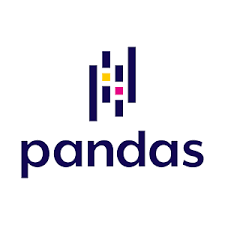

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://codenation-challenges.s3-us-west-1.amazonaws.com/data-science-0/black_friday.csv), que reúne dados sobre transações de compras em uma loja de varejo, disponibilizado originalmente pela [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/black-friday/). Esse notebook está dividido em três partes: setup, a análise exploratória dos dados, e, por fim, a resposta das perguntas.

## _Set up_ 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [4]:
black_friday = pd.read_csv("black_friday.csv")

## Overview 

In [5]:
# questão 1
black_friday.shape

(537577, 12)

In [6]:
black_friday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
# Apenas as colunas Product_Category_2 e Product_Category_3 possuem valores faltantes
black_friday.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## Análise exploratória dos dados (EDA) 

Numa Black Friday, o aumento do número de vendas é um objetivo almejado. Junto a isso, é importante constatar o valor das compras alcançadas. Abaixo conseguimos observar a distribuição das compras. 

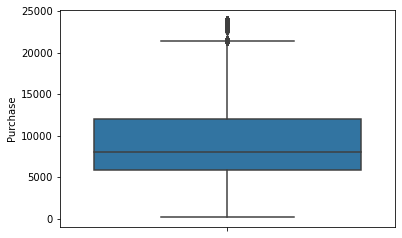

In [8]:
sns.boxplot(y=black_friday.Purchase);

A observaçãço da faixa etária dos consumidores ao longo da Black Friday é destacada à baixo. Consumidores entre 26 e 35 anos são os que tiveram maiores valores de compras no computo total em relação às demais faixas etárias. A identificação da faixa etária é importante para reconhecer o parte do público alvo que está sendo atendido pelo dia promocioanal.

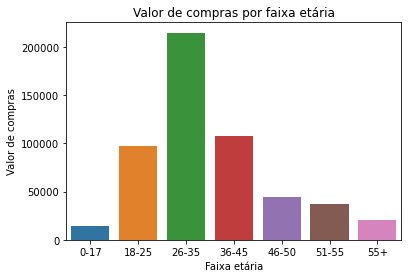

In [9]:
ordem = sorted(black_friday.Age.unique())
sns.countplot(x='Age', order=ordem, data=black_friday);
plt.xlabel('Faixa etária');
plt.ylabel('Valor de compras');
plt.title('Valor de compras por faixa etária');

A análise acima pode ser refinada. A orientação do público alvo que desejamos ser atendidos passa pela precisa identificação da base de consumidores. Com adição do gênero, podemos perceber que homens, em geral, e com faixa etária entre 26 e 35 anos, em particular, compõem o principal perfil dos consumidores da Black Friday.

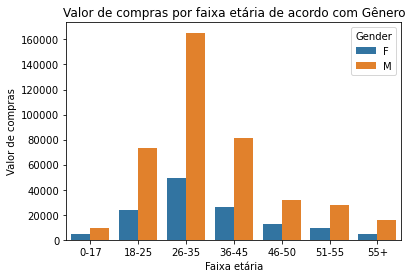

In [10]:
sns.countplot(x='Age', hue='Gender', order=ordem, data=black_friday);
plt.xlabel('Faixa etária');
plt.ylabel('Valor de compras');
plt.title('Valor de compras por faixa etária de acordo com Gênero');

Ao adicionar mais uma camada à análise exploratória, podemos perceber que o perfil do consumidor na Black Friday foi protagonizado por consumidores solteiros. O reconhecimento esse indicador contribui para traçar uma melhor estratégia de marketing tanto das campanhas do dia promocial quanto das propagandas dos produtos, uma vez que os solteiros apenas passam a ganhar preponderância a partir da faixa etária entre 46 e 50 anos. 

Text(0.5, 1.0, 'Valor de compras por faixa etária de acordo com Gênero')

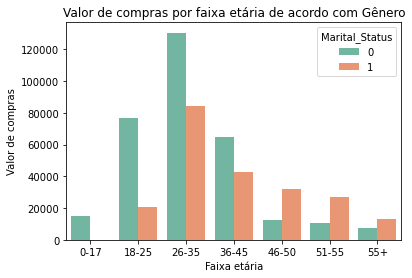

In [11]:
sns.countplot(x='Age', hue='Marital_Status', order=ordem, palette=sns.color_palette("Set2"),data=black_friday);
plt.xlabel('Faixa etária');
plt.ylabel('Valor de compras');
plt.title('Valor de compras por faixa etária de acordo com Gênero')

Por fim, podemos observar a média de consumo de acordo com as faixas etárias dos consumidores. Vale apontar que, a despeito da faixa etária entre 51 e 55 anos não figurar com maior expressão nos gráficos anteriores, ela detém a maior média de consumo entre todas. Pelo seu destaque, e por estar relacionado com uma variável importante, o estudo dessa faixa etária merece maior tratamento. 

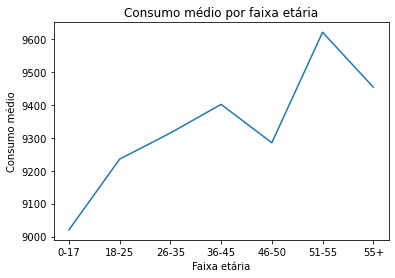

In [12]:
media = black_friday.groupby('Age')['Purchase'].mean()
media.plot(kind='line');
plt.xlabel('Faixa etária');
plt.ylabel('Consumo médio');
plt.title('Consumo médio por faixa etária');

In [13]:
black_friday.query("Age=='51-55'")['Purchase'].describe()

count    37618.000000
mean      9620.616620
std       5035.326515
min        187.000000
25%       6056.000000
50%       8172.000000
75%      12578.500000
max      23960.000000
Name: Purchase, dtype: float64

In [14]:
#questão 2
black_friday.groupby('Gender')['Age'].value_counts()[0]

49348

In [15]:
# questão 3
black_friday.User_ID.nunique()

5891

In [16]:
# questão 4
black_friday.dtypes.nunique()

3

In [17]:
# questão 5
round((black_friday.loc[(black_friday.Product_Category_2.isna()| black_friday.Product_Category_3.isna())].shape[0]/black_friday.shape[0]),2)

0.69

In [18]:
black_friday.loc[(black_friday.Product_Category_2.isna()| black_friday.Product_Category_3.isna())]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
...,...,...,...,...,...,...,...,...,...,...,...,...
537570,1004736,P00162442,M,18-25,20,A,1,1,1,16.0,NaN,15491
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [35]:
# questão 6
black_friday.isna().sum().max()

373299

In [38]:
# questão 7
black_friday.Product_Category_3.dropna().value_counts().keys()[0]

16.0

Boa referência sobre normalização e padronização para machine learning: https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

In [21]:
# questão 8
round(((black_friday['Purchase'] - black_friday['Purchase'].min())/ (black_friday['Purchase'].max() - black_friday['Purchase'].min())).mean(),2)

0.38

In [22]:
# questao 9
# Fazendo a padronização manual
padr = (black_friday.Purchase - black_friday.Purchase.mean())/ black_friday.Purchase.std()
# Filtrando o serie para caso entre -1 e 1
padr[(padr <=1) & (padr >= -1)]
# Contando os valores
padr[(padr <=1) & (padr >= -1)].count()

348631

In [23]:
# questão 10
p2_p3 = black_friday.loc[black_friday.Product_Category_2.isna(), ['Product_Category_2','Product_Category_3']]
p2_p3.Product_Category_2.equals(p2_p3.Product_Category_3)

True

## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

O método ```.shape``` retorna uma tupla (uma estrutura de dados em Python imutável) com o número de linhas (obsevações) e o numéro de colunas(variáveis) em um dataframe.

In [24]:
def q1():
    return black_friday.shape

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

Utilizamos o método ```groupby()``` que permite o agrupamento de colunas (criando assim uma coleção de dataframes), frequentemente usado para a condensação de dados de acordo com algum critério. Abaixo, agrupamos de acordo com gênero e contamos o valores conforme a idade. 

In [25]:
def q2():
    return black_friday.groupby('Gender')['Age'].value_counts()[0].item()

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

Enquanto a função ```unique()``` retorna todos os valores únicos de uma coluna, a função ```nunique()``` apresenta justamente a quantidade desses valores únicos. Essa função é bastante útil sobretudo quando temos uma coluna muito dispersa, com uma quantidade grande de valores únicos.

In [26]:
def q3():
    return black_friday.User_ID.nunique()

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

Aqui, novamente, o método ```.nunique()``` demonstra sua funcionalidade.

In [27]:
def q4():
    return black_friday.dtypes.nunique()

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

Em nosso _setup_, descobrimos que as únicas colunas que possuem valores faltantes são a ```Product_Category_2``` e ```Product_Category_3```. Assim sendo, utilizamos o método ```loc``` (que serve tanto para ```Series``` quanto```DataFrames```)para filtar as linhas em que uma ou outra se faziam presentes com valores faltantes. Com auxílio do método ```shape```, restou realizar uma divisão simples entre o números de linhas com ao menos um valor null e o total de linhas.

In [28]:
def q5():
    return (black_friday.loc[(black_friday.Product_Category_2.isna()| black_friday.Product_Category_3.isna())].shape[0]/black_friday.shape[0])

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

Fazendo uso da informação obtida na Visão Geral a respeito dos valores faltantes, utilizamos o método ```max()``` para retorna o maior valor da ```Series```.

In [29]:
def q6():
    return black_friday.isna().sum().max().item()

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

Para retirar os nulls, recorremos à ```dropna()```, que descarta os valores faltantes da colunas ```Product_Category_3```. Com ```value_counts()``` realizamos a conta dos valores e com ```keys()``` retiramos apenas a lista de index da ```Series```, restando apenas acessar a sua primeira posição.

In [30]:
def q7():
    return black_friday.Product_Category_3.dropna().value_counts().keys()[0]

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

Algoritmos de _Machine Leaning_ apresentam dificuldades para lidar com variáveis numérias com escalas muito diferentes. Dessa forma, uma prática corriqueira para evitar que o algoritmo fique enviesado para as variáveis com maior ordem de grandeza é recorrer à __normalização__ ou à __padronização__ (como veremos adiante). Ambas almejam transformar todas as variáveis na mesma ordem de grandeza.

A normalização transforma as  variáveis dentro do intervalo de 0 e 1 e, caso tenha resultado negativo, -1 e 1. Sua fórmula é:
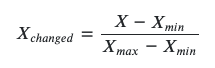
Para essa operação, pode-se utilizar o método [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) da biblioteca _ScikitLearn_. Abaixo, realizamos a operação manual e a operação com o método.



In [40]:
def q8():
    return ((black_friday['Purchase'] - black_friday['Purchase'].min())/ (black_friday['Purchase'].max() - black_friday['Purchase'].min())).mean()

In [43]:
minmax = MinMaxScaler()
normaliz = minmax.fit_transform(black_friday['Purchase'].values.reshape(-1, 1))
normaliz.mean()

0.3847939036269795

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

Ao subtrair a média e dividir pela variância, a padronização é outra ténica para transformar as variáveis para outra ordem de grandeza. Nesse caso, ao padronizar, as variáveis irão resultar em uma média igual a 0 e um desvio padrão igual a 1. Sua fórmula é:
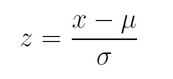

O _ScikitLearn_ possui o pacote [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) para padronização. Novamente, realizamos a operação manual e a operação com o método.


In [44]:
def q9():
    padr = (black_friday.Purchase - black_friday.Purchase.mean())/ black_friday.Purchase.std()
    return padr[(padr <=1) & (padr >= -1)].count().item()

In [50]:
padronizacao = StandardScaler()
compras_padronizadas = standard.fit_transform(black_friday['Purchase'].values.reshape(-1, 1))
len(compras_padronizadas[(compras_padronizadas > -1) & (compras_padronizadas < 1)])

348631

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

Com auxílio do método ```loc```, filtramos a coluna ```Product_Category_2``` sem os valores faltantes ao lado da coluna ```Product_Category_3```. Usando o método ```equals()```, podemos comparar se duas colunas possuem os mesmos valores, retornando um booleano. 

In [33]:
def q10():
    p2_p3 = black_friday.loc[black_friday.Product_Category_2.isna(), ['Product_Category_2','Product_Category_3']]
    return p2_p3.Product_Category_2.equals(p2_p3.Product_Category_3)

Referências:
   * [Normalizar ou padronizar as variáveis?](https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9)